# 겨울방학 파이썬 스터디 6차시

<font color = "#CC3D3D"><p>
- [Data Visualization with Pandas](#Data-Visualization-with-Pandas)
  
    
- [Data Visualization with Matplotlib](#Data-Visualization-with-Matplotlib)
    - [Line plot](#Line-plot)
        - [스타일 지정](#스타일-지정)
        - [그림 범위 지정](#그림-범위-지정)
        - [틱 설정](#틱-설정)
        - [그리드 설정](#그리드-설정)
        - [선 여러개 그리기](#선-여러개-그리기)
        - [겹쳐서 그리기](#겹쳐서-그리기)
        - [범례](#범례)
        - [라벨, 타이틀](#라벨,-타이틀)
    - [Bar chart](#Bar-chart)
    - [Pie chart](#Pie-chart)
    - [Histogram](#Histogram)
    - [Scatter plot](#Scatter-plot)
    
    
- [Data Visualization with Seaborn](#Data-Visualization-with-Seaborn)
    - [Pair plot](#Pair-plot)
    - [Count plot](#Count-plot)
    - [Bar plot](#Bar-plot)
    - [Box plot](#Box-plot)
    - [Violin plot](#Violin-plot)
    - [Heatmap](#Heatmap)
    - [KDE plot](#KDE-plot)

<font color = "#CC3D3D"><p>
# Data Visualization with Pandas

Pandas의 시리즈나 데이터프레임은 plot()이라는 시각화 메서드를 내장하고 있다. plot()은 matplotlib를 내부적으로 import하여 사용한다. 

In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)
df = pd.DataFrame(np.random.randn(100, 3), # 표준정규분포 행렬(100, 3)
                   index = pd.date_range('1/1/2021', periods=100),
                   columns = ['A', 'B', 'C']).cumsum() # DataFrame 축에 대한 누적 합계
df.head()

,A,B,C
2021-01-01,-1.085631,0.997345,0.282978
2021-01-02,-2.591925,0.418745,1.934415
2021-01-03,-5.018605,-0.010167,3.200351
2021-01-04,-5.885345,-0.689054,3.105642
2021-01-05,-4.393955,-1.327956,2.661660


<AxesSubplot:>

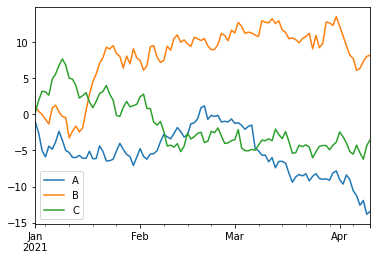

In [2]:
df.plot.line()

`subplots` 파라미터를 `True`로 설정하여, DataFrame의 각 필드(Series)를 서로 다른 플롯(subplot)에 도식할 수 있다.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

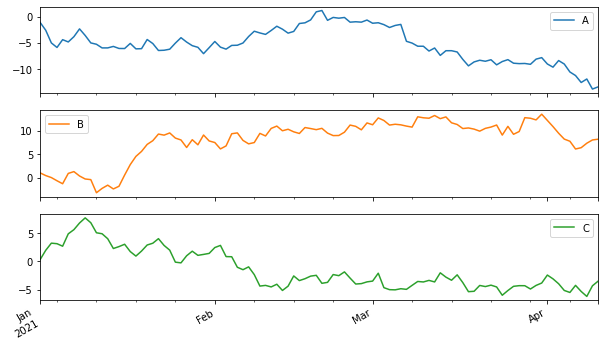

In [3]:
df.plot(subplots=True, figsize=(10, 6))

`.plot.*` 메소드로 아래와 같은 여러가지 플롯을 그릴 수 있다 (DataFrame, Series 모두 가능)

* `plot.bar()`
* `plot.pie()`
* `plot.hist()`
* `plot.kde()`
* `plot.box()`
* `plot.scatter()`
* `plot.area()`

<AxesSubplot:ylabel='Frequency'>

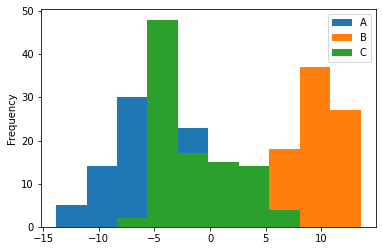

In [4]:
df.plot.hist()

<AxesSubplot:ylabel='Density'>

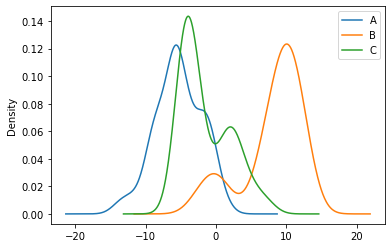

In [5]:
df.plot(kind='kde')

<font color = "#CC3D3D"><p>
# Data Visualization with Matplotlib

Matplotlib은 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다.  
* Matplotlib을 사용한 시각화 예제 : http://matplotlib.org/gallery.html

## pyplot 서브패키지

In [6]:
import matplotlib.pyplot as plt

`matplotlib`을 이용해 시각화한 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 magic command

In [7]:
%matplotlib inline # cmd에서 사용할 만한 명령어들을 사용자의 편의를 위해서 파이썬으로 들여온 것

UsageError: unrecognized arguments: # cmd에서 사용할 만한 명령어들을 사용자의 편의를 위해서 파이썬으로 들여온 것


Matplotlib에서 한글을 사용하려면 `한글 폰트`를 적용해야 하는데, 사용하는 OS에 따라 적당한 한글 폰트를 지정해야 한다.

In [8]:
from matplotlib import font_manager, rc
import platform

your_os = platform.system()
if your_os == 'Linux':
    rc('font', family = 'NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = ttf).get_name()
    rc('font', family = font_name)
elif your_os == 'Darwin':
    rc('font', family = 'AppleGothic')
rc('axes', unicode_minus = False)

## Line plot

- 가장 간단한 플롯은 선을 그리는 라인 플롯(line plot)이다. 
- 라인 플롯은 데이터가 시간, 순서 등에 따라 어떻게 변화하는지 보여주기 위해 사용한다.
- 명령은 pyplot 서브패키지의 `plot` 명령을 사용한다.

plot 명령에 데이터 `리스트` 혹은 `ndarray` 객체를 넘긴다.  

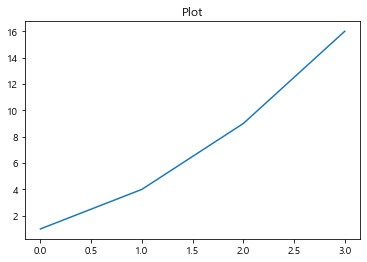

In [9]:
plt.title("Plot")
plt.plot([1, 4, 9, 16])
plt.show()

x 축을 지정해주지 않으면 자료 위치 즉, 틱(tick)은 자동으로 `0, 1, 2, 3` 이 된다.  
만약 이 x tick 위치를 별도로 명시하고 싶다면 두 개의 같은 길이의 `리스트` 혹은 `배열` 자료를 넣는다.

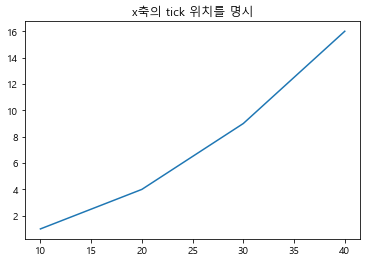

In [10]:
plt.title("x축의 tick 위치를 명시")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

### 스타일 지정

`plot` 명령어에서는 다음과 같이 추가 문자열 인수를 사용하여 스타일을 지원한다.  
스타일 문자열은 `색깔(color)`, `마커(marker)`, `선 종류(line style)`의 순서로 지정한다.   
만약 이 중 일부가 생략되면 디폴트값이 적용된다.

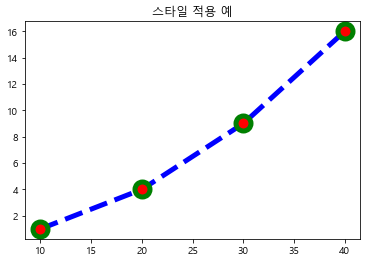

In [11]:
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.title("스타일 적용 예")
plt.show()

### 그림 범위 지정

플롯 그림을 보면 몇몇 점들은 그림의 범위 경계선에 있어서 잘 보이지 않는 경우가 있다.  
그림의 범위를 수동으로 지정하려면 `xlim` 명령과 `ylim` 명령을 사용한다.   
이 명령들은 그림의 범위가 되는 x축, y축의 최소값과 최대값을 지정한다.

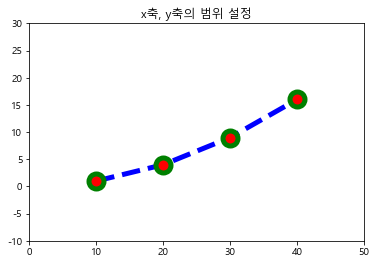

In [12]:
plt.title("x축, y축의 범위 설정")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.xlim(0, 50)
plt.ylim(-10, 30)

plt.show()

### 틱 설정

플롯이나 차트에서 축상의 위치 표시 지점을 틱(tick)이라고 하고 이 틱에 써진 숫자 혹은 글자를 틱 라벨(tick label)이라고 한다.  
틱의 위치나 틱 라벨은 Matplotlib이 자동으로 정해주지만 만약 수동으로 설정하고 싶다면 `xticks` 명령이나 `yticks` 명령을 사용한다.

In [13]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

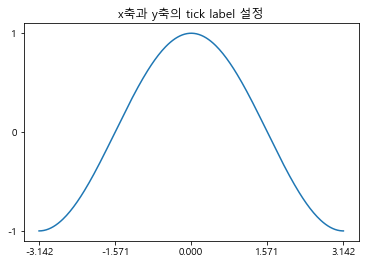

In [14]:
plt.title("x축과 y축의 tick label 설정")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

### 그리드 설정

틱 위치를 잘 보여주기 위해 그림 중간에 그리드 선(grid line)을 나타내려면 `grid(True)`를 사용한다.

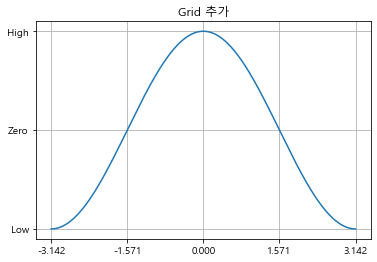

In [15]:
plt.title("Grid 추가")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.grid(True)
plt.show()

### 선 여러개 그리기

라인 플롯에서 선을 하나가 아니라 여러개를 그리고 싶은 경우에는 x 데이터, y 데이터, 스타일 문자열을 반복하여 인수로 넘긴다.  
이 경우에는 하나의 선을 그릴 때 처럼 x 데이터나 스타일 문자열을 생략할 수 없다.

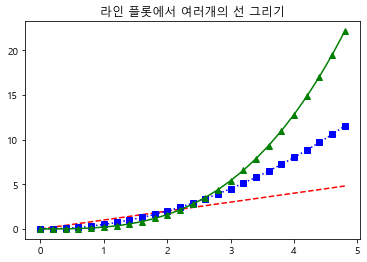

In [16]:
t = np.arange(0., 5., 0.2)
plt.title("라인 플롯에서 여러개의 선 그리기")
plt.plot(t, t, 'r--', t, 0.5 * t**2, 'bs:', t, 0.2 * t**3, 'g^-')
plt.show()

### 겹쳐서 그리기

하나의 `plot` 명령이 아니라 복수의 `plot` 명령을 하나의 그림에 겹쳐서 그릴 수도 있다. 

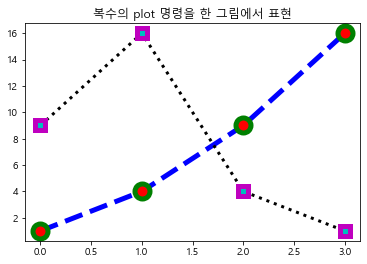

In [17]:
plt.title("복수의 plot 명령을 한 그림에서 표현")
plt.plot([1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.plot([9, 16, 4, 1],
         c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c")
plt.show()

### 라벨, 타이틀

플롯의 x축 위치와 y축 위치에는 각각 그 데이터가 의미하는 바를 표시하기 위해 라벨(label)를 추가할 수 있다.  
라벨을 붙이려면 `xlabel`. `ylabel` 명령을 사용한다. 또 플롯의 위에는 `title` 명령으로 제목(title)을 붙일 수 있다.

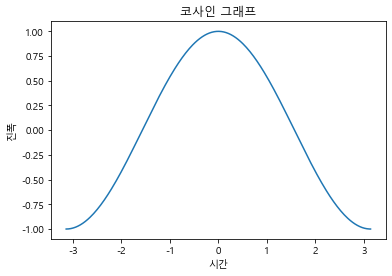

In [19]:
plt.plot(X, C, label="cos")
plt.xlabel("시간")
plt.ylabel("진폭")
plt.title("코사인 그래프")
plt.show()

### 범례

여러개의 라인 플롯을 동시에 그리는 경우에는 각 선이 무슨 자료를 표시하는지를 보여주기 위해 `legend` 명령으로  범례(legend)를 추가할 수 있다.  
범례의 위치는 자동으로 정해지지만 수동으로 설정하고 싶으면 `loc` 인수를 사용한다. 

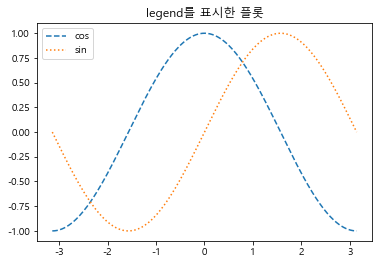

In [18]:
plt.title("legend를 표시한 플롯")
plt.plot(X, C, ls="--", label="cos")
plt.plot(X, S, ls=":", label="sin")
plt.legend(loc=0)
plt.show()

## Bar chart

x 데이터가 카테고리 값인 경우에는 `bar` 명령과 `barh` 명령으로 바 차트(bar chart) 시각화를 할 수 있다.  
가로 방향으로 바 차트를 그리려면 `barh` 명령을 사용한다.

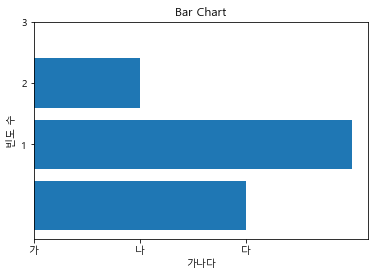

In [20]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.barh(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

## Pie chart

카테고리 별 값의 상대적인 비교를 해야 할 때는 `pie` 명령으로 파이 차트(pie chart)를 그릴 수 있다.  

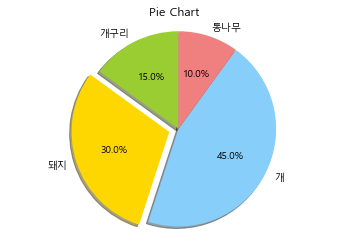

In [21]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90) # 부채꼴 안에 표시될 숫자의 형식
plt.axis('equal') # 원의 형태를 유지
plt.show()

## Histogram

히스토그램을 그리기 위한 `hist` 명령도 있다. `hist` 명령은 `bins` 인수로 데이터를 집계할 구간 정보를 받는다.

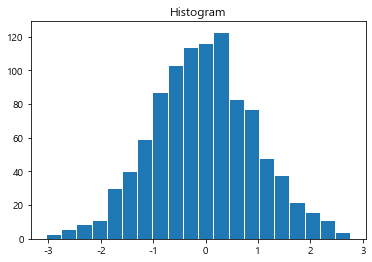

In [22]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
plt.hist(x, bins=20, edgecolor='w')
plt.show()

## Scatter plot

2차원 데이터 즉, 두 개의 실수 데이터 집합의 상관관계를 살펴보려면 `scatter` 명령으로 스캐터 플롯을 그린다.  
스캐터 플롯의 점 하나의 위치는 데이터 하나의 x, y 값이다.

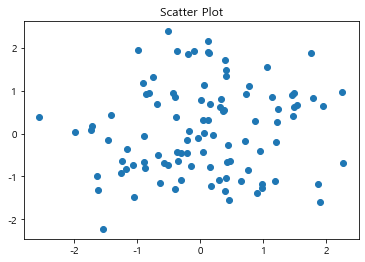

In [23]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

`plt.style.use` 명령을 사용하여 라인, 포인트, 배경 등에 대한 기본 스타일을 설정할 수 있다.

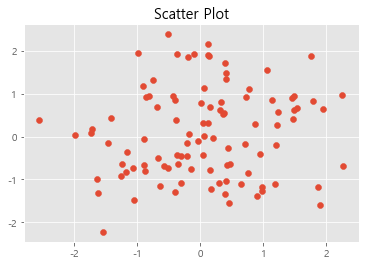

In [24]:
plt.style.use('ggplot')

np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

<font color = "#CC3D3D"><p>
# Data Visualization with Seaborn

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다.  
기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.
* Seaborn을 사용한 시각화 예제 : http://seaborn.pydata.org/examples/index.html

In [25]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
display(titanic)
iris = sns.load_dataset("iris")
display(iris)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Pair plot

`pairplot`은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.

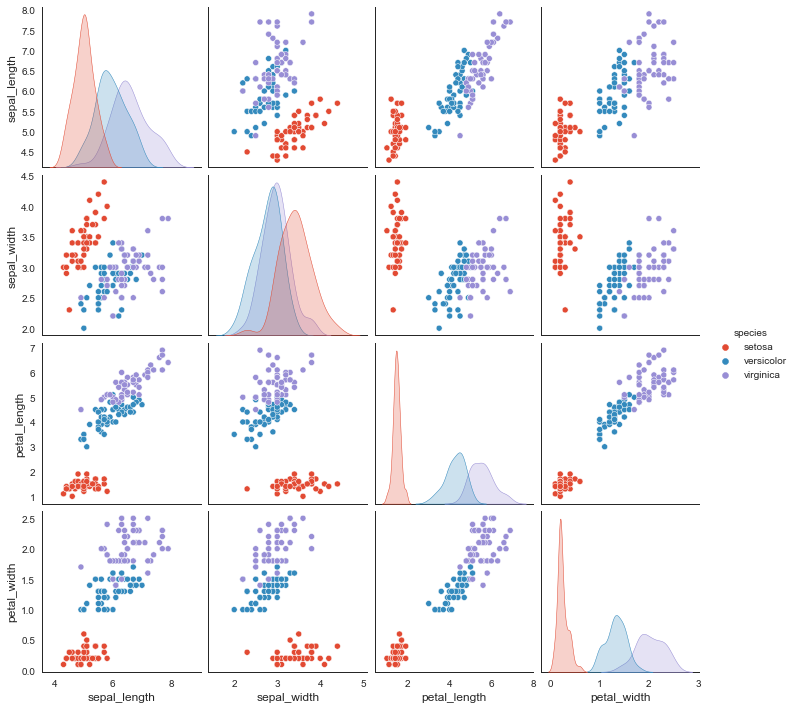

In [26]:
sns.set_style("white")
sns.pairplot(data=iris, hue='species')
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


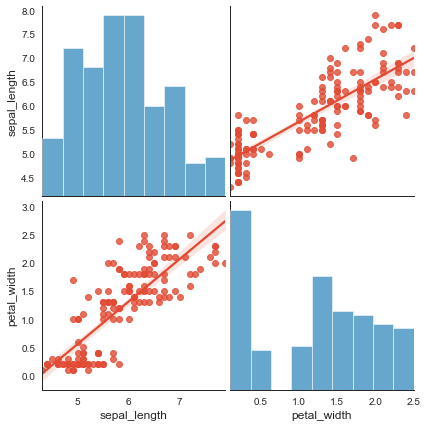

In [27]:
sns.pairplot(data=iris, vars=['sepal_length', 'petal_width'], kind='reg', size=3)
plt.show()

## Count plot

`countplot` 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다. 

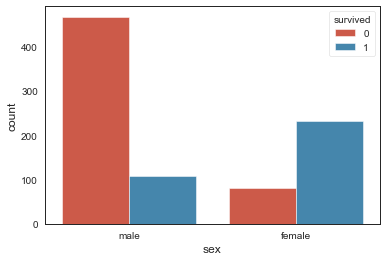

In [28]:
sns.countplot(x="sex", hue="survived", data=titanic)
plt.show()

## Bar plot

`barplot` 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다.  
평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

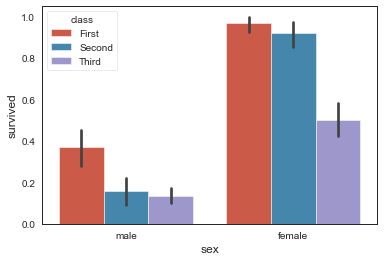

In [29]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)
plt.show()

## Box plot

`boxplot` 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려준다.  
박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다. 

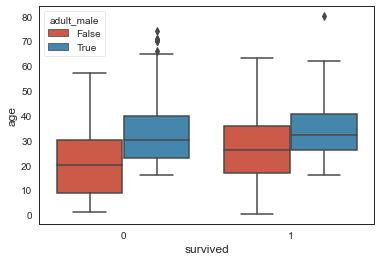

In [30]:
sns.boxplot(x="survived", y="age", hue="adult_male", data=titanic)
plt.show()

## Violin plot

`boxplot`이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 `violinplot`은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다.   
세로 방향으로 커널 밀도 히스토그램을 그리는데 위 아래가 대칭이 되어 바이올린처럼 보인다.

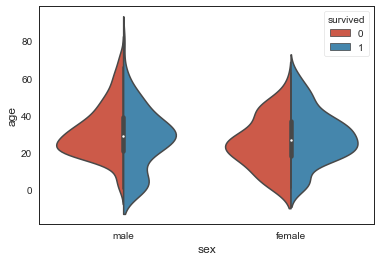

In [31]:
sns.violinplot(x="sex", y='age', hue='survived', split=True, data=titanic)
plt.show()

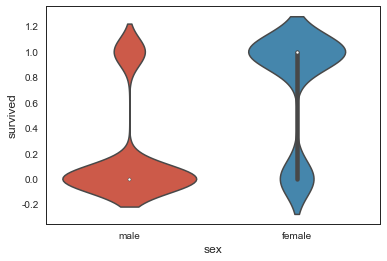

In [32]:
sns.violinplot(x="sex", y='survived', data=titanic)
plt.show()

## Heatmap

데이터가 2차원이고 모든 값이 카테고리  값이면 변수 간 상관관계를 보기위해 `heatmap` 명령을 많이 사용한다.

In [33]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


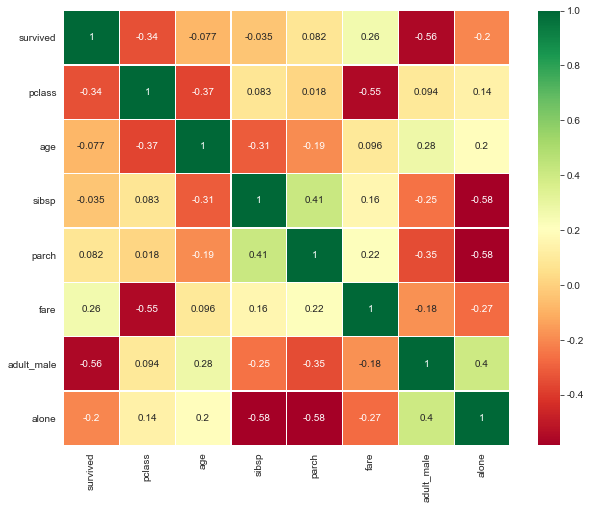

In [34]:
sns.heatmap(titanic.corr(), cmap='RdYlGn', linewidths=0.2, annot=True) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## KDE plot

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

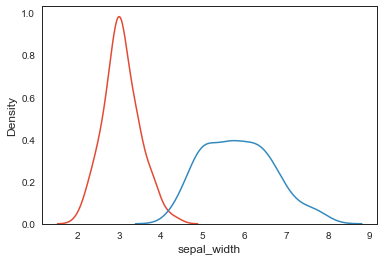

In [35]:
sns.kdeplot(iris.sepal_width)
sns.kdeplot(iris.sepal_length)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


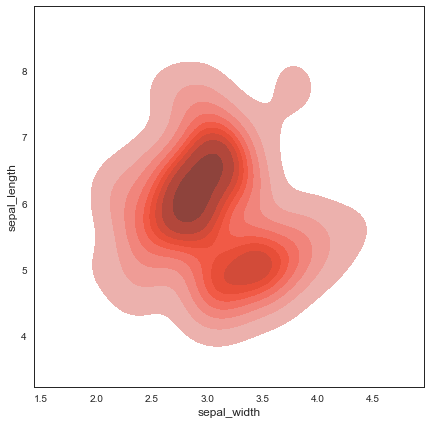

In [36]:
plt.subplots(figsize=(7, 7))
sns.kdeplot(iris.sepal_width, iris.sepal_length, shade=True) # 색을 채워줌
plt.show()